In [1]:
from M1M3tools import *
from datetime import datetime
from datetime import timedelta
import os
import yaml

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Circle

plt.style.use('classic')

%matplotlib inline

In [2]:
#What columns are in this table for campaign #2
table_name = 'm1m3_logevent_AppliedForces'
filename = 'efdData/AppliedForces_column_list2.txt'
if not os.path.isfile(filename):
    fid = open(filename, 'w')
    descr = pd.read_sql_query('describe {}'.format(table_name), engine2)
    for fieldName in descr['Field']:
        print(fieldName)
        fid.write('%s\n'%fieldName)
    fid.close()
else:
    print('-------Reading from %s-------------'%filename)
    fid = open(filename, 'r')
    for line in fid:
        print(line.strip())
    fid.close()     

-------Reading from efdData/AppliedForces_column_list2.txt-------------
date_time
private_revCode
private_sndStamp
private_rcvStamp
private_seqNum
private_origin
private_host
Timestamp
XForces_1
XForces_2
XForces_3
XForces_4
XForces_5
XForces_6
XForces_7
XForces_8
XForces_9
XForces_10
XForces_11
XForces_12
YForces
ZForces
Fx
Fy
Fz
Mx
My
Mz
ForceMagnitude
priority


### The following query the EFD to demonstrate that the string in column ZForces has been truncated

In [3]:
month = 2
day = 15
hour = 17
minute = 48
b0 = datetime(2019, month, day, hour, minute, 0)
b1 = b0 + timedelta(minutes = -2)
b2 = b0 + timedelta(minutes = 2)
#b1 = b0 + timedelta(minutes = 0)
#b2 = b0 + timedelta(days = 1)
table_name = 'm1m3_logevent_AppliedForces'
#table_name = 'MTM1M3TS_thermalData'
query = 'select * from {0} where {0}.date_time between \'{1}\' and \'{2}\';'.format(table_name, b1, b2)
print(query)
df1 = pd.read_sql_query(query, engine2)
for i in range(5):
    print(len( df1.ZForces[i].split()  )) # - timedelta(hours=7)
#print(df1.ZForces[0])

select * from m1m3_logevent_AppliedForces where m1m3_logevent_AppliedForces.date_time between '2019-02-15 17:46:00' and '2019-02-15 17:50:00';
146
146
146
146
146


### Prior to the last day, we had these optimized surfaces

In [3]:
f1time = [1, 25, 17, 54] #33/28nm surfaces
f3time = [2, 14, 23, 13] #30/26nm surfaces

In [4]:
f1 = get_F_EFD(f1time) 
#f1 = get_F_EFD_C1C2(1, 25, 17, 54) #33/28nm surfaces #same results as above

#f2 = get_F_EFD(2, 11, 17, 13) #35/26nm surfaces # EFD data lost

#f3 = get_F_EFD(2, 14, 23, 13) #30/26nm surfaces #AppliedForces truncated
f3 = get_F_EFD_C1C2(f3time) 

-------Reading from efdData/AppliedForces_190125_1754.csv-------------
-------Reading from efdData/AppliedCylinderForces_190214_2313.csv-------------


### Surfaces from the last day

In [5]:
fatime = [2, 21, 16, 6] #28/24nm surfaces
fbtime = [2, 21, 17, 5] #31/20nm surfaces
fctime = [2, 21, 17, 34] #27/21nm surfaces
fdtime = [2, 21, 22, 49] #28/20nm surfaces

In [6]:
fa = get_F_EFD_C1C2(fatime)
fb = get_F_EFD_C1C2(fbtime)
fc = get_F_EFD_C1C2(fctime)
fd = get_F_EFD_C1C2(fdtime)

-------Reading from efdData/AppliedCylinderForces_190221_1606.csv-------------
-------Reading from efdData/AppliedCylinderForces_190221_1705.csv-------------
-------Reading from efdData/AppliedCylinderForces_190221_1734.csv-------------
-------Reading from efdData/AppliedCylinderForces_190221_2249.csv-------------


### Look at the differences in forces: 
* f3 didn't have additional quad forces. f1 had those.
* f3 were with LSST bending modes

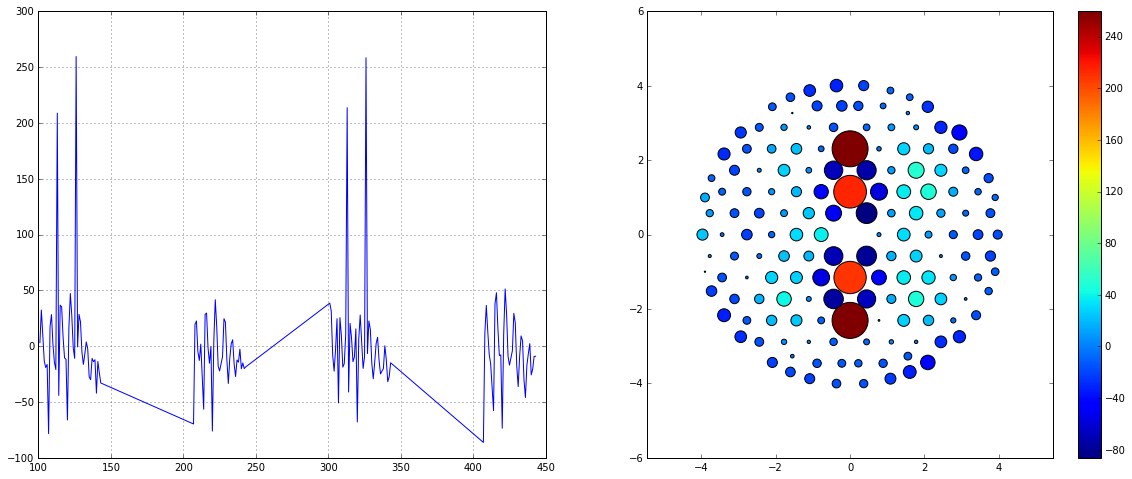

In [7]:
a=f1[:,3]-f3[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])

### We adjusted quads and those around it to further optimize the localized surface feature due to moments created by loadspreaders

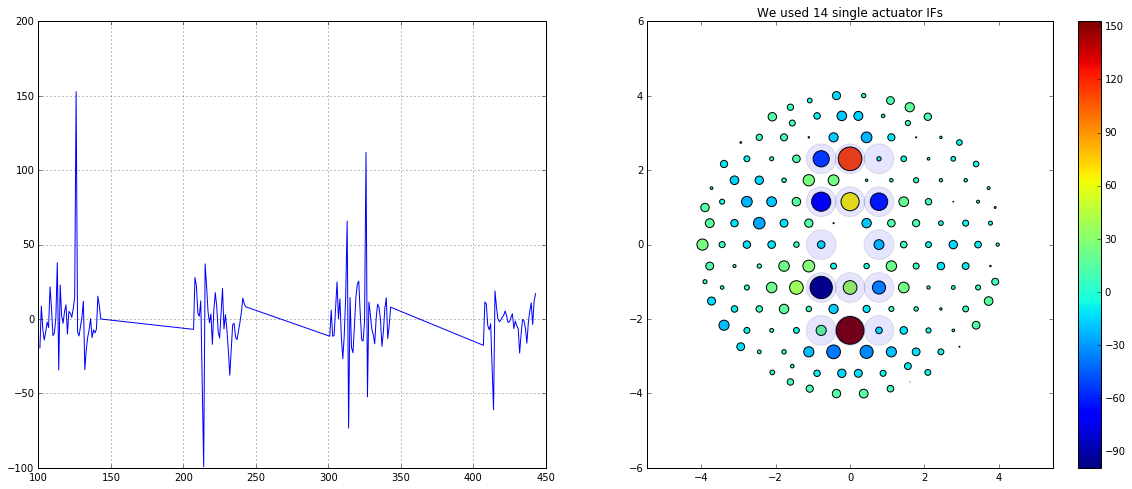

In [9]:
a=fa[:,3]-f3[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])
quadID = [126, 113, 313, 326, 114, 214, 314, 414, 127, 227, 327, 427, 101, 301]
for i in range(len(quadID)):
    id = np.where(actID==quadID[i])[0][0]
    circ = Circle((xact[id], yact[id]),0.4, alpha=.1)
    ax[1].add_patch(circ)
aa = ax[1].set_title('We used %d single actuator IFs'%(len(quadID)))

#### One more iteration: further adjustments using 14 single actuator influence functions

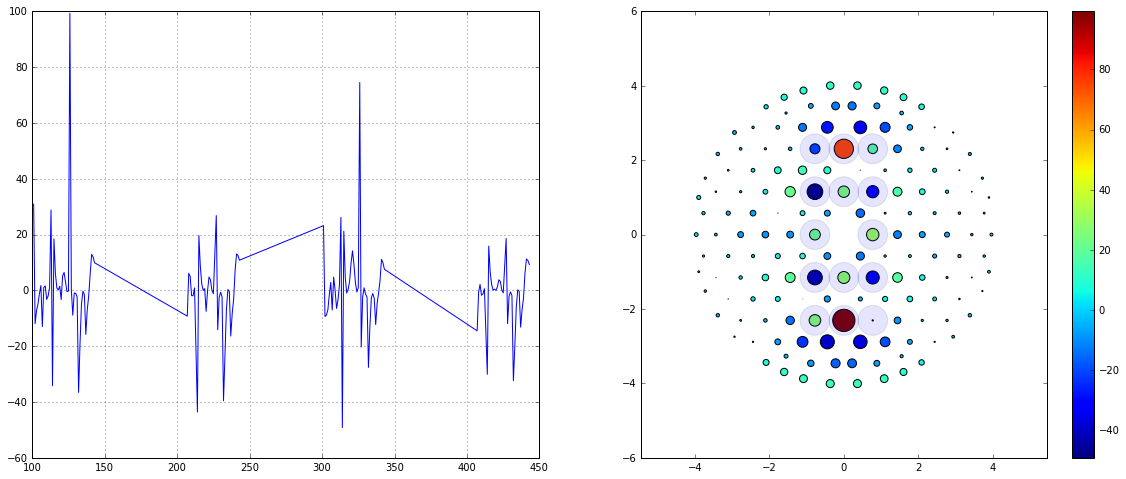

In [10]:
a=fb[:,3]-fa[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])
quadID = [126, 113, 313, 326, 114, 214, 314, 414, 127, 227, 327, 427, 101, 301]
for i in range(len(quadID)):
    id = np.where(actID==quadID[i])[0][0]
    circ = Circle((xact[id], yact[id]),0.4, alpha=.1)
    ax[1].add_patch(circ)

#### One more iteration: but nothing is changing

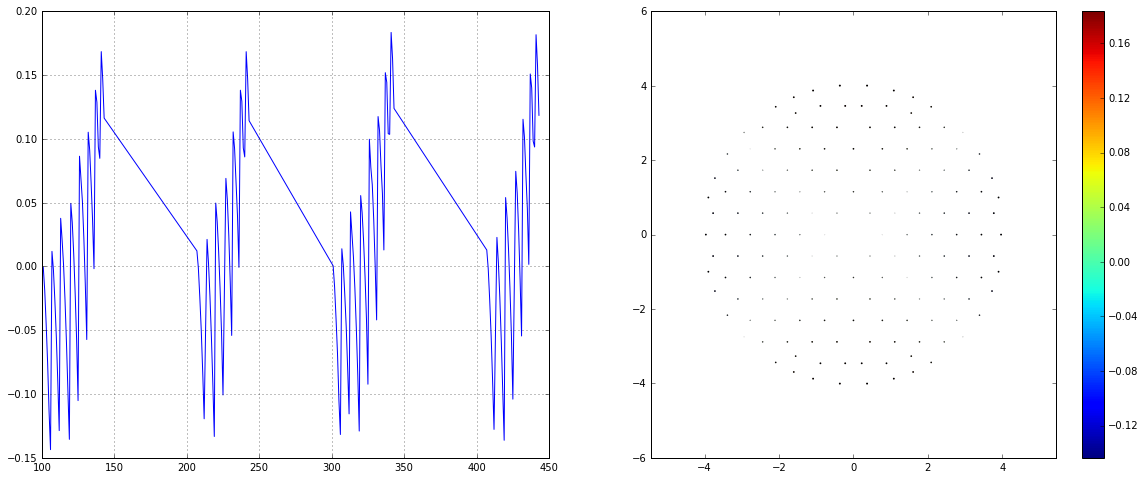

In [11]:
a=fc[:,3]-fb[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])

#### By the end of the day, things had drifted a bit, so additional low order bending modes had to be added to retrieve that optimized surface

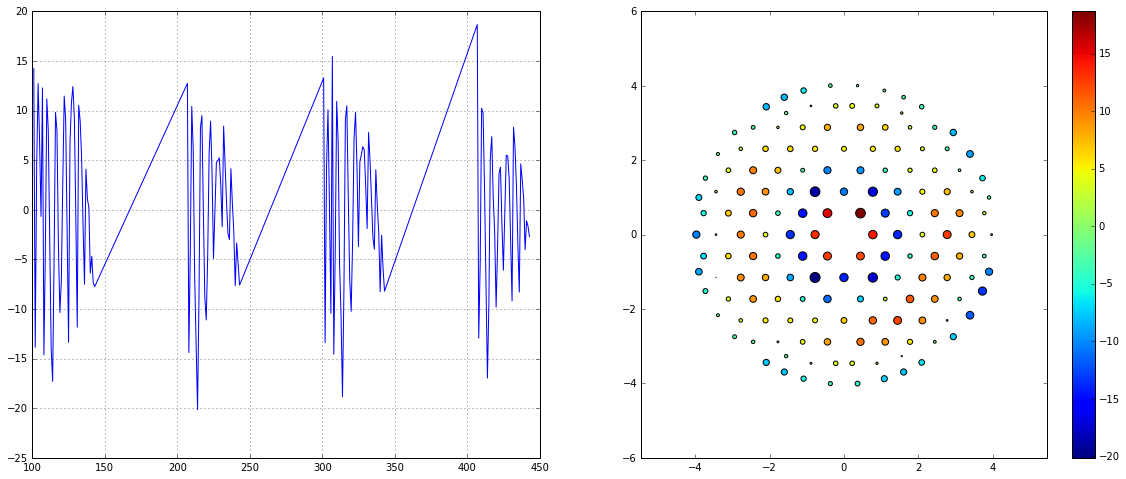

In [12]:
a=fd[:,3]-fc[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])

#### but fa is not good to be included in the average for LUT, because

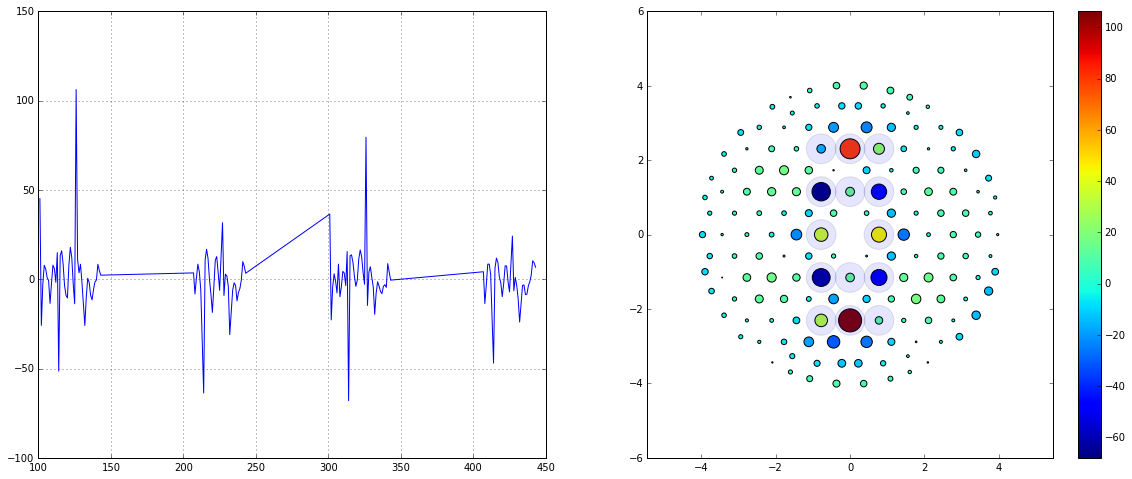

In [13]:
a=fd[:,3]-fa[:,3]
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],a)
ax[0].grid()
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])
for i in range(len(quadID)):
    id = np.where(actID==quadID[i])[0][0]
    circ = Circle((xact[id], yact[id]),0.4, alpha=.1)
    ax[1].add_patch(circ)

### We will use fb, fc, fd in the average for LUT forces
* f1 had additional quad forces
* f3 was before the quad adjustment, which helps compensate localized surface features caused by local moments created by loadspreaders
* fa is systematically different from fb, fc, fd. So the optimization wasn't there yet, although the surface quality was getting close.
* fb = fc
* fd is different from fb and fc by a lower order bending. Adding fd will help beat down noise. 1/3 of the lower oder bending will also get into the average, but it will be easy to be taken out by the AOS.

### What about x and y forces?

In [15]:
#get one set of balance forces to look at
f3b = get_F_EFD([2, 14, 23, 13], table_name= 'm1m3_logevent_AppliedBalanceForces')

-------Reading from efdData/AppliedBalanceForces_190214_2313.csv-------------


Text(0.5, 1.0, 'x forces on 190221 (fa)')

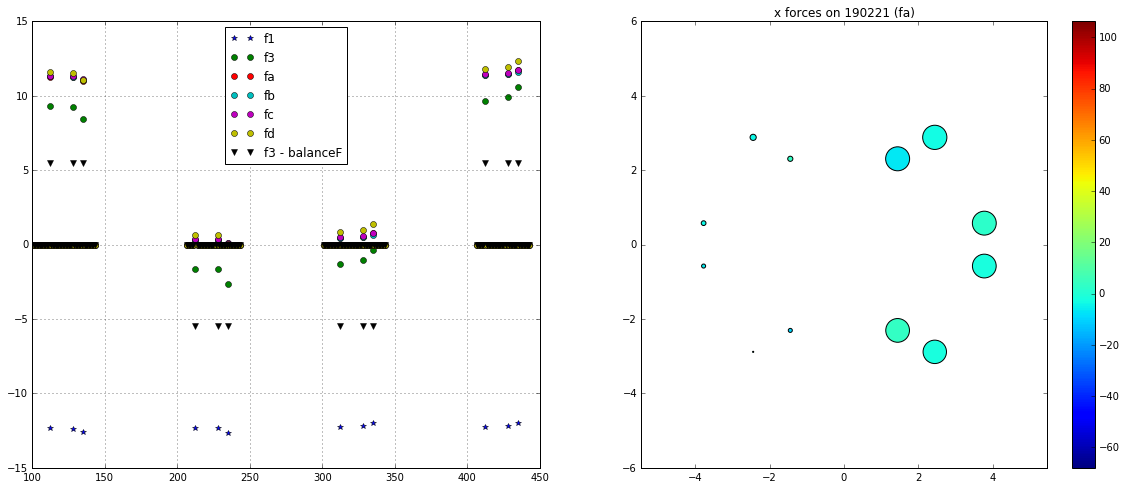

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],f1[:,1], '*', label='f1')
ax[0].plot(f1[:,0],f3[:,1], 'o', label='f3')
ax[0].plot(f1[:,0],fa[:,1], 'o', label='fa')
ax[0].plot(f1[:,0],fb[:,1], 'o', label='fb')
ax[0].plot(f1[:,0],fc[:,1], 'o', label='fc')
ax[0].plot(f1[:,0],fd[:,1], 'o', label='fd')
ax[0].plot(f1[:,0],f3[:,1]-f3b[:,1], 'v', label='f3 - balanceF')
ax[0].grid()
ax[0].legend(loc='best')
img = ax[1].scatter(xact, yact, abs(fa[:,1])*50, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('x forces on 190221 (fa)')

#### Explanation of what we see above, 
* there was an external net x force, probably from imperfect centering. 
    * for f1, the net x force was negative
    * for other force sets, the net x force was positive
* for f1, all x forces were equal magnitude, because we started from all zeros, then net Fx distribution is flat.
* for other forces, we started from 5.48N for the 100s and 400s actuators, and -5.48N for the 200s and 300s actuators. (see black triangles). The FB system added equal positve forces to all 12 x actuators, so everything shifted up a bit.

Text(0.5, 1.0, 'y forces on 190221 (fa)')

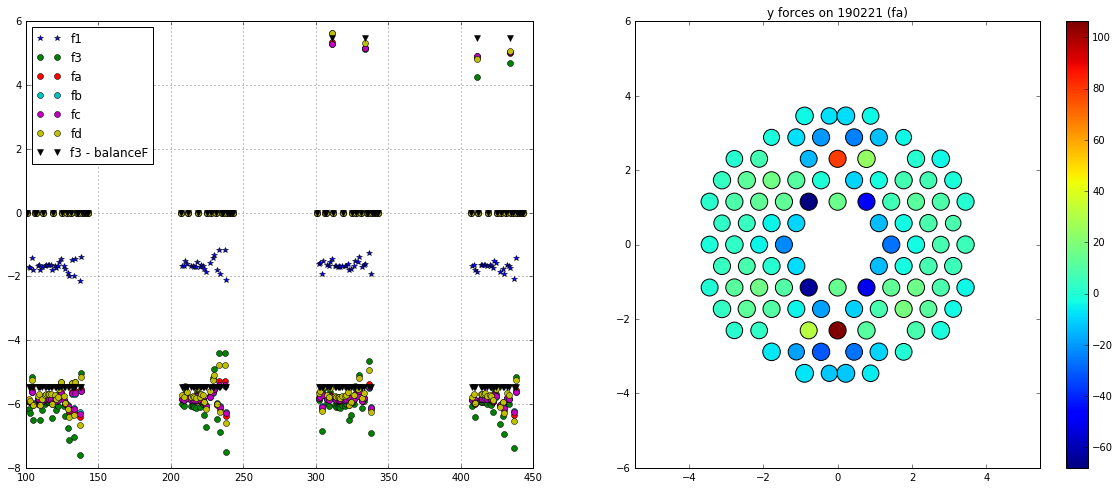

In [17]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(f1[:,0],f1[:,2], '*', label='f1')
ax[0].plot(f1[:,0],f3[:,2], 'o', label='f3')
ax[0].plot(f1[:,0],fa[:,2], 'o', label='fa')
ax[0].plot(f1[:,0],fb[:,2], 'o', label='fb')
ax[0].plot(f1[:,0],fc[:,2], 'o', label='fc')
ax[0].plot(f1[:,0],fd[:,2], 'o', label='fd')
ax[0].plot(f1[:,0],f3[:,2]-f3b[:,2], 'v', label='f3 - balanceF')
ax[0].grid()
ax[0].legend(loc='best')
img = ax[1].scatter(xact, yact, abs(fa[:,2])*50, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('y forces on 190221 (fa)')

#### Explanation of what we see above, 
* there was an external net y force, probably from imperfect centering or actuator weight. 
    * for f1, the net y force was negative
    * for other force sets, the net y force was only due to actuator weight, because they do not deviate much from the initial +/-5.48N, as calculated.
* for f1, all y forces were equal magnitude, because we started from all zeros, then net Fy distribution is flat.
* for other forces, we started from -5.48N for most actuators, except +5.48N for the 4 actuators with reversed orientation. (see black triangles). The FB system only added some noise on the +/-5.48N.

## To extrapolate the LUT to off-zenith positions, we need to look at the individual components of the forces

#### First we verify the force components are what we expect

In [18]:
# in addtion to the applied total forces and measured total forces, these are all what we know on component level
fbfb = get_F_EFD(fbtime, table_name= 'm1m3_logevent_AppliedBalanceForces')
fbst = get_F_EFD(fbtime, table_name= 'm1m3_logevent_AppliedStaticForces')
fbbm = get_F_EFD(fbtime, table_name= 'm1m3_logevent_AppliedActiveOpticForces')

fcfb = get_F_EFD(fctime, table_name= 'm1m3_logevent_AppliedBalanceForces')
fcst = get_F_EFD(fctime, table_name= 'm1m3_logevent_AppliedStaticForces')
fcbm = get_F_EFD(fctime, table_name= 'm1m3_logevent_AppliedActiveOpticForces')

fdfb = get_F_EFD(fdtime, table_name= 'm1m3_logevent_AppliedBalanceForces')
fdst = get_F_EFD(fdtime, table_name= 'm1m3_logevent_AppliedStaticForces')
fdbm = get_F_EFD(fdtime, table_name= 'm1m3_logevent_AppliedActiveOpticForces')

-------Reading from efdData/AppliedBalanceForces_190221_1705.csv-------------
-------Reading from efdData/AppliedStaticForces_190221_1705.csv-------------
-------Reading from efdData/AppliedActiveOpticForces_190221_1705.csv-------------
---No XForces---
---No ZForces---
-------Reading from efdData/AppliedBalanceForces_190221_1734.csv-------------
-------Reading from efdData/AppliedStaticForces_190221_1734.csv-------------
-------Reading from efdData/AppliedActiveOpticForces_190221_1734.csv-------------
---No XForces---
---No ZForces---
-------Reading from efdData/AppliedBalanceForces_190221_2249.csv-------------
-------Reading from efdData/AppliedStaticForces_190221_2249.csv-------------
-------Reading from efdData/AppliedActiveOpticForces_190221_2249.csv-------------
---No XForces---
---No ZForces---


In [19]:
fb0 = fb - fbfb - fbst - fbbm
fc0 = fc - fcfb - fcst - fcbm
fd0 = fd - fdfb - fdst - fdbm
#restore first column: act IDs
fb0[:,0] = fb[:,0]
fc0[:,0] = fc[:,0]
fd0[:,0] = fd[:,0]

Text(0.5, 1.0, 'Bending Force Diff')

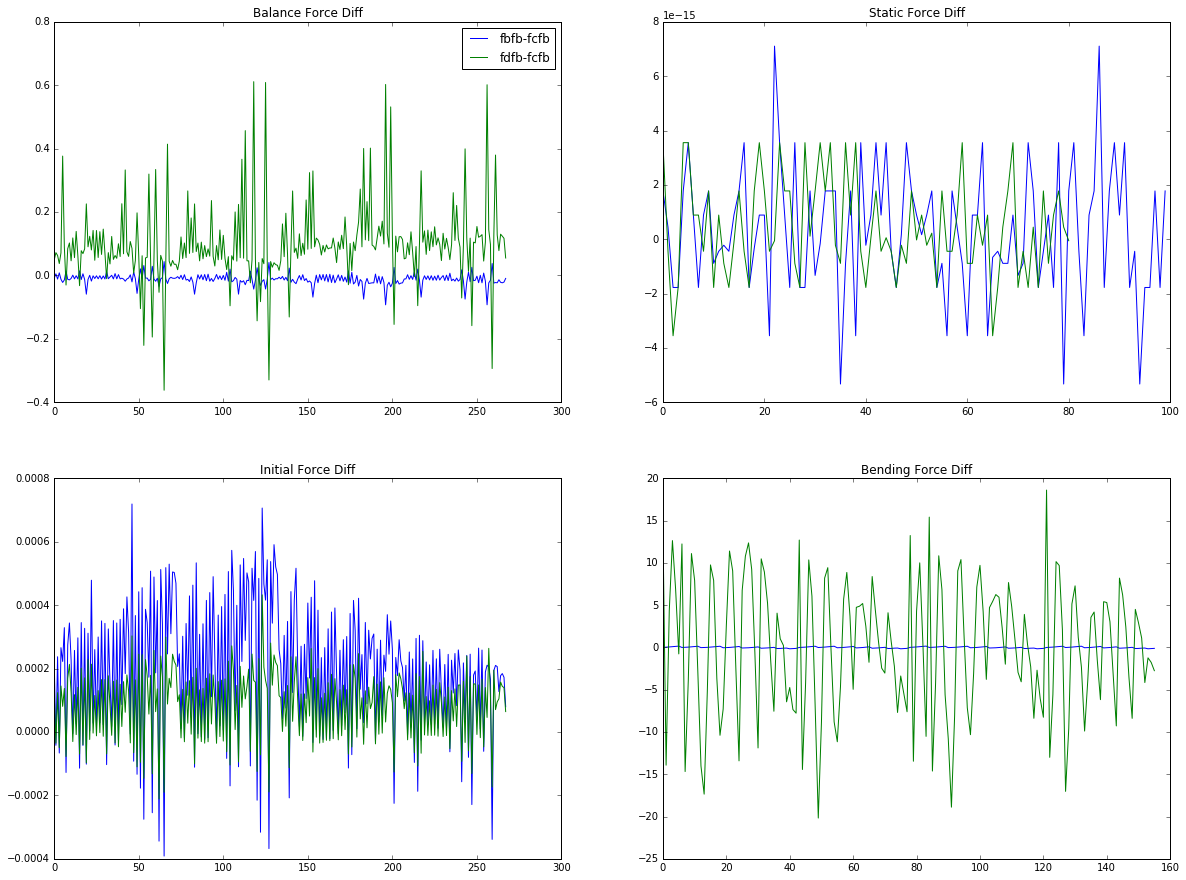

In [20]:
fig, ax = plt.subplots(2,2, figsize=(20, 15))
a=(fbfb-fcfb)
a = a[a!=0]
ax[0][0].plot(a, label='fbfb-fcfb')
b=(fdfb-fcfb)
b = b[b!=0]
ax[0][0].plot(b, label='fdfb-fcfb')
ax[0][0].set_title('Balance Force Diff')
ax[0][0].legend()

a=(fbst-fcst)
a = a[a!=0]
ax[0][1].plot(a)
b=(fdst-fcst)
b = b[b!=0]
ax[0][1].plot(b)
ax[0][1].set_title('Static Force Diff')

a=(fb0-fc0)
a = a[a!=0]
ax[1][0].plot(a)
b=(fd0-fc0)
b = b[b!=0]
ax[1][0].plot(b)
ax[1][0].set_title('Initial Force Diff')

a=(fbbm-fcbm)
a = a[a!=0]
ax[1][1].plot(a)
b=(fdbm-fcbm)
b = b[b!=0]
ax[1][1].plot(b)
ax[1][1].set_title('Bending Force Diff')

In [21]:
fafb = get_F_EFD(fatime, table_name= 'm1m3_logevent_AppliedBalanceForces')
fast = get_F_EFD(fatime, table_name= 'm1m3_logevent_AppliedStaticForces')
fabm = get_F_EFD(fatime, table_name= 'm1m3_logevent_AppliedActiveOpticForces')

fa0 = fa - fafb - fast - fabm

-------Reading from efdData/AppliedBalanceForces_190221_1606.csv-------------
-------Reading from efdData/AppliedStaticForces_190221_1606.csv-------------
-------Reading from efdData/AppliedActiveOpticForces_190221_1606.csv-------------
---No XForces---
---No ZForces---


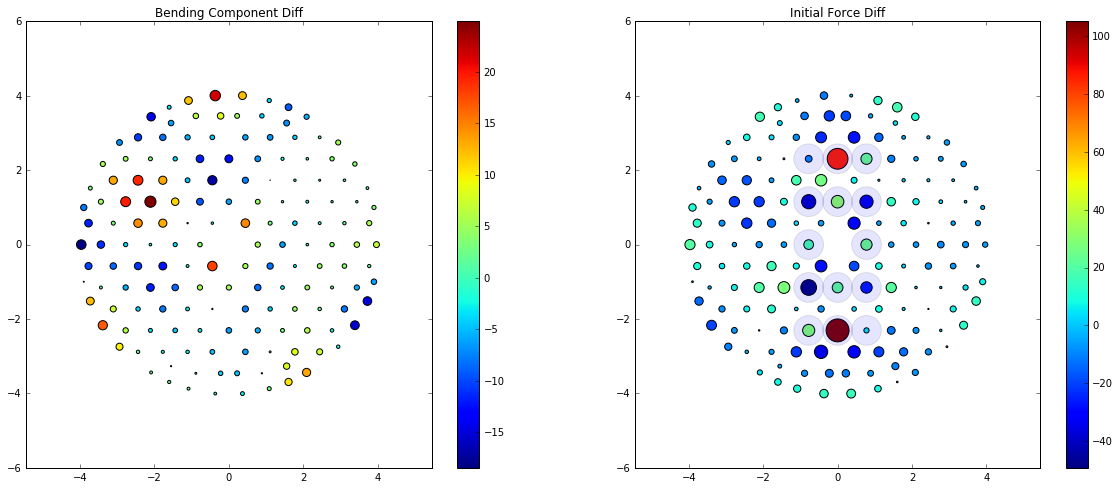

In [22]:
#confirm that single actuator adjustments were included in initial force component
fig, ax = plt.subplots(1,2, figsize=(20, 8))
a=fbbm[:,3]-fabm[:,3]
img = ax[0].scatter(xact, yact, abs(a)*5, a)
ax[0].axis('equal')
fig.colorbar(img, ax=ax[0])
ax[0].set_title('Bending Component Diff')
a=fb0[:,3]-fa0[:,3]
img = ax[1].scatter(xact, yact, abs(a)*5, a)
ax[1].axis('equal')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('Initial Force Diff')
for i in range(len(quadID)):
    id = np.where(actID==quadID[i])[0][0]
    circ = Circle((xact[id], yact[id]),0.4, alpha=.1)
    ax[1].add_patch(circ)

#### The DAA part has a special zenith angle dependence. This was generated with sec4.3IntialForces.ipynb already

In [23]:
with open('data/fxfyfzDAAs.yaml', "r") as yamlFile:
    aa = yaml.safe_load(yamlFile)
FDAA = np.array(aa)

#### The initial forces used in the Mirror Lab included the following
1. 2014 forces - ML hardware + LSST hardware
2. forces due to 14 influence functions
3. forces due to DAAs weights

We need to subtract the 3rd, then we have all the components of FG.
FB is in principle due to gravity as well. But it is closely related to how the mirror is positioned. 
What we measured in the Mirror Lab applied to the positioning in the Mirror Lab. 
Considering that the actuators are being reinstalled in Chile, and these forces are small, and they will be reapplied automatically by the force balance system, we leave them out in the LUT.

In [24]:
FG = np.zeros(FDAA.shape)
FG[0,:,:] = (fb0+fc0+fd0)/3 #for theta_z = 0, averge the initial forces
FG[0,:,1:] -= FDAA[0,:,1:]  #for theta_z = 0, subtract forces due to DAA weights [leave actIDs alone]
#FG[0,:,1:] += (fbfb[:,1:] + fcfb[:,1:] + fdfb[:, 1:])/3

In [25]:
idx = abs(FG[0,:,1])<0.05
FG[0,idx,1] = 0 #these are just noise

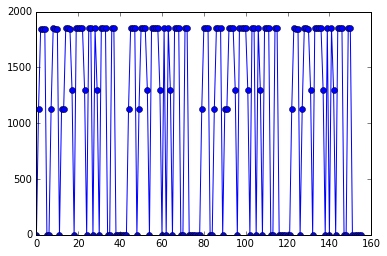

In [166]:
# get horizon forces (based on FEA so far)
aa= pd.read_csv('data/horizonFTot.csv',header=None)
aa = np.array(aa)
FG[-1,:,0] = aa[:,0] #act ID
FG[-1,:,2] = aa[:,1] #y force
FG[-1,:,3] = aa[:,2] #z force
#Yes, these y-forces only take a few discrete values. They came from Ed Hileman
# The reason is that we decided not to use the y-forces for any surface optimization.
plt.plot(aa[:,1],'-o')  

In [167]:
nza = FDAA.shape[0]
dza = 90/(nza-1)
for i in range(1,nza-1):
    tp = dza*i/180*np.pi
    FG[i,:,0] = actID
    #x forces are ~6N each, due to mirror off center. FEA assumes for hirizon they are all zeros.
    #anyhow, x,y,z forces all obey sin and cos rule
    FG[i,:,1:] = FG[0,:,1:]*np.cos(tp) + FG[-1,:,1:]*np.sin(tp)

Text(0.5, 0, 'zenith angle (deg)')

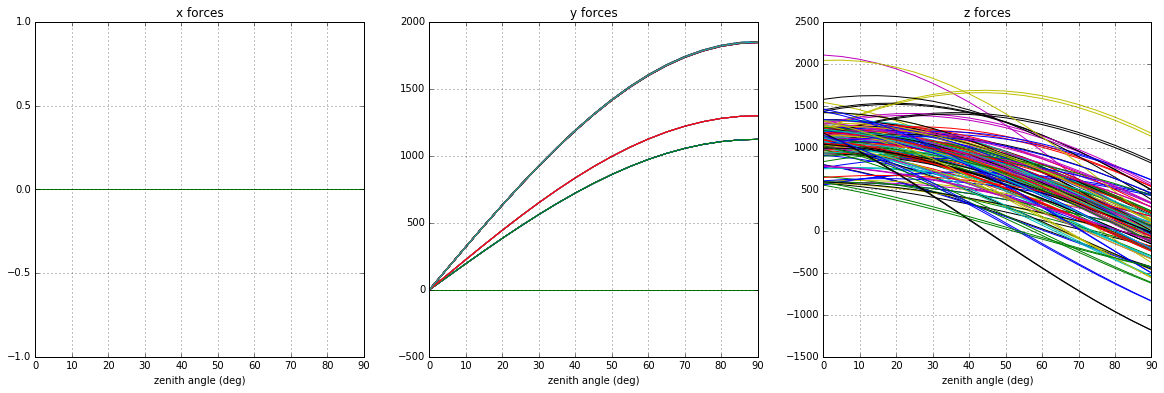

In [169]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
xx = np.linspace(0,90,nza)
a = ax[0].plot(xx,FG[:,:,1])
b = ax[1].plot(xx,FG[:,:,2])
c = ax[2].plot(xx,FG[:,:,3])
ax[0].set_ylim([-1,1])
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].set_title('x forces')
ax[1].set_title('y forces')
ax[2].set_title('z forces')
ax[0].set_xlabel('zenith angle (deg)')
ax[1].set_xlabel('zenith angle (deg)')
ax[2].set_xlabel('zenith angle (deg)')

In [170]:
FBM = np.zeros(FDAA.shape)
FBM[:,:,0] = FDAA[:,:,0]
for i in range(nza):
    FBM[i,:,:] =  (fbst+fcst+fdst)/3
    FBM[i,:,:] +=  (fbbm+fcbm+fdbm)/3
FBM[:,:,0] = FBM[:,:,0]/2

In [171]:
FLUT = FG + FDAA + FBM
FLUT[:,:,0] = FLUT[:,:,0]/3

Text(0.5, 0, 'zenith angle (deg)')

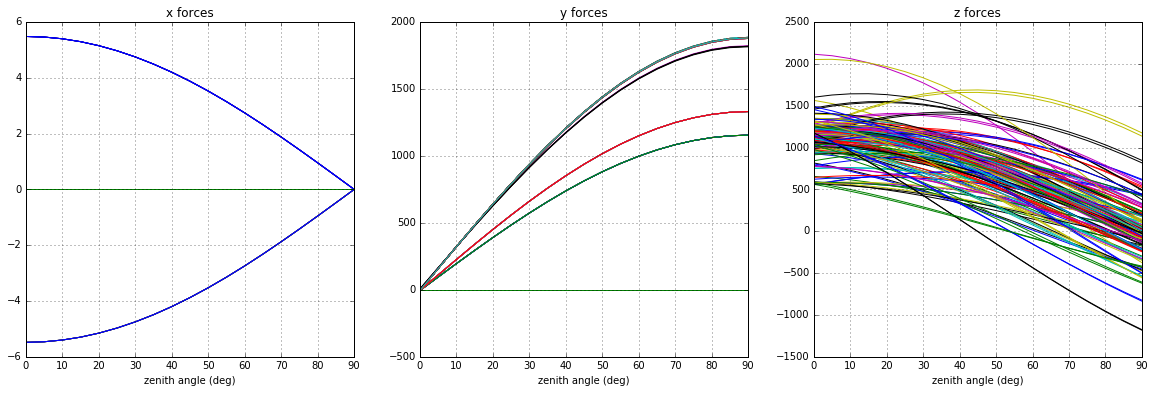

In [172]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
xx = np.linspace(0,90,nza)
a = ax[0].plot(xx,FLUT[:,:,1])
b = ax[1].plot(xx,FLUT[:,:,2])
c = ax[2].plot(xx,FLUT[:,:,3])
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].set_title('x forces')
ax[1].set_title('y forces')
ax[2].set_title('z forces')
ax[0].set_xlabel('zenith angle (deg)')
ax[1].set_xlabel('zenith angle (deg)')
ax[2].set_xlabel('zenith angle (deg)')

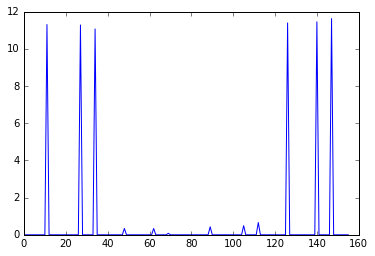

In [173]:
# yes, the x forces are the way they are
plt.plot(fb[:,1])

In [174]:
with open('data/FLUT.yaml', "w") as yamlFile:
    yaml.safe_dump(FLUT.tolist(), stream=yamlFile, default_flow_style=None)

In [39]:
M1fb = ['%s/Processed/190221_5-4b/M1 set2 190221 5-4.h5'%dataDir]
M3fb = ['%s/Processed/190221_5-4b/M3 set2 190221 5-4.h5'%dataDir]

M1fc = ['%s/Processed/190221_5-4d/M1 set3 190221 5-4.h5'%dataDir]
M3fc = ['%s/Processed/190221_5-4d/M3 set3 190221 5-4.h5'%dataDir]

M1fd = ['%s/Processed/190221_5-4e/M1 set6 190221 5-4.h5'%dataDir]
M3fd = ['%s/Processed/190221_5-4e/M3 set6 190221 5-4.h5'%dataDir]

m1sb,centerRow1,centerCol1,pixelSize1 = readH5Map(M1fb)
m1sc,centerRow1,centerCol1,pixelSize1 = readH5Map(M1fc)
m1sd,centerRow1,centerCol1,pixelSize1 = readH5Map(M1fd)

m3sb,centerRow1,centerCol1,pixelSize1 = readH5Map(M3fb)
m3sc,centerRow1,centerCol1,pixelSize1 = readH5Map(M3fc)
m3sd,centerRow1,centerCol1,pixelSize1 = readH5Map(M3fd)

m1s = (m1sb+m1sc+m1sd)/3
m3s = (m3sb+m3sc+m3sd)/3



/Processed/190221_5-4b/M1 set2 190221 5-4.h5: Thu Feb 21 10:06:27 2019 
/Processed/190221_5-4d/M1 set3 190221 5-4.h5: Thu Feb 21 10:36:10 2019 
/Processed/190221_5-4e/M1 set6 190221 5-4.h5: Thu Feb 21 15:51:04 2019 
/Processed/190221_5-4b/M3 set2 190221 5-4.h5: Thu Feb 21 10:07:53 2019 
/Processed/190221_5-4d/M3 set3 190221 5-4.h5: Thu Feb 21 10:36:54 2019 
/Processed/190221_5-4e/M3 set6 190221 5-4.h5: Thu Feb 21 15:50:37 2019 


In [40]:
m1s.shape

(986, 986)

In [33]:
/Processed/: Thu Feb 21 15:51:04 2019 
/Processed/: Thu Feb 21 15:50:37 2019 

In [35]:

fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, 190221, '5-4', 'b', 2, '190221', '5-4')))
m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

/Processed/190221_5-4b/M1 set2 190221 5-4.h5: Thu Feb 21 10:06:27 2019 


In [36]:
fileset

['/Users/bxin/largeData/M1M3_ML/Processed/190221_5-4b/M1 set2 190221 5-4.h5']